In [2]:
import numpy as np
import matplotlib.pyplot as plt

NG = 512
N = 64
θ = np.linspace(0, 2 * np.pi, N, endpoint=False)
Δθ = 2 * np.pi / N
Xᵧ = np.array([np.sin(θ), np.cos(θ)])
φᵧ = Xᵧ[0,:]**2 - Xᵧ[1,:]**2 + 2

In [3]:
# Define the ranges for each dimension
x_range = np.linspace(-1, 1, NG, endpoint=False)

# Generate the grid points
X,Y = np.meshgrid(x_range, x_range)
X = X.flatten()
Y = Y.flatten()
X = np.array([X, Y])

Text(853.3333333333338, 0.5, 'y')

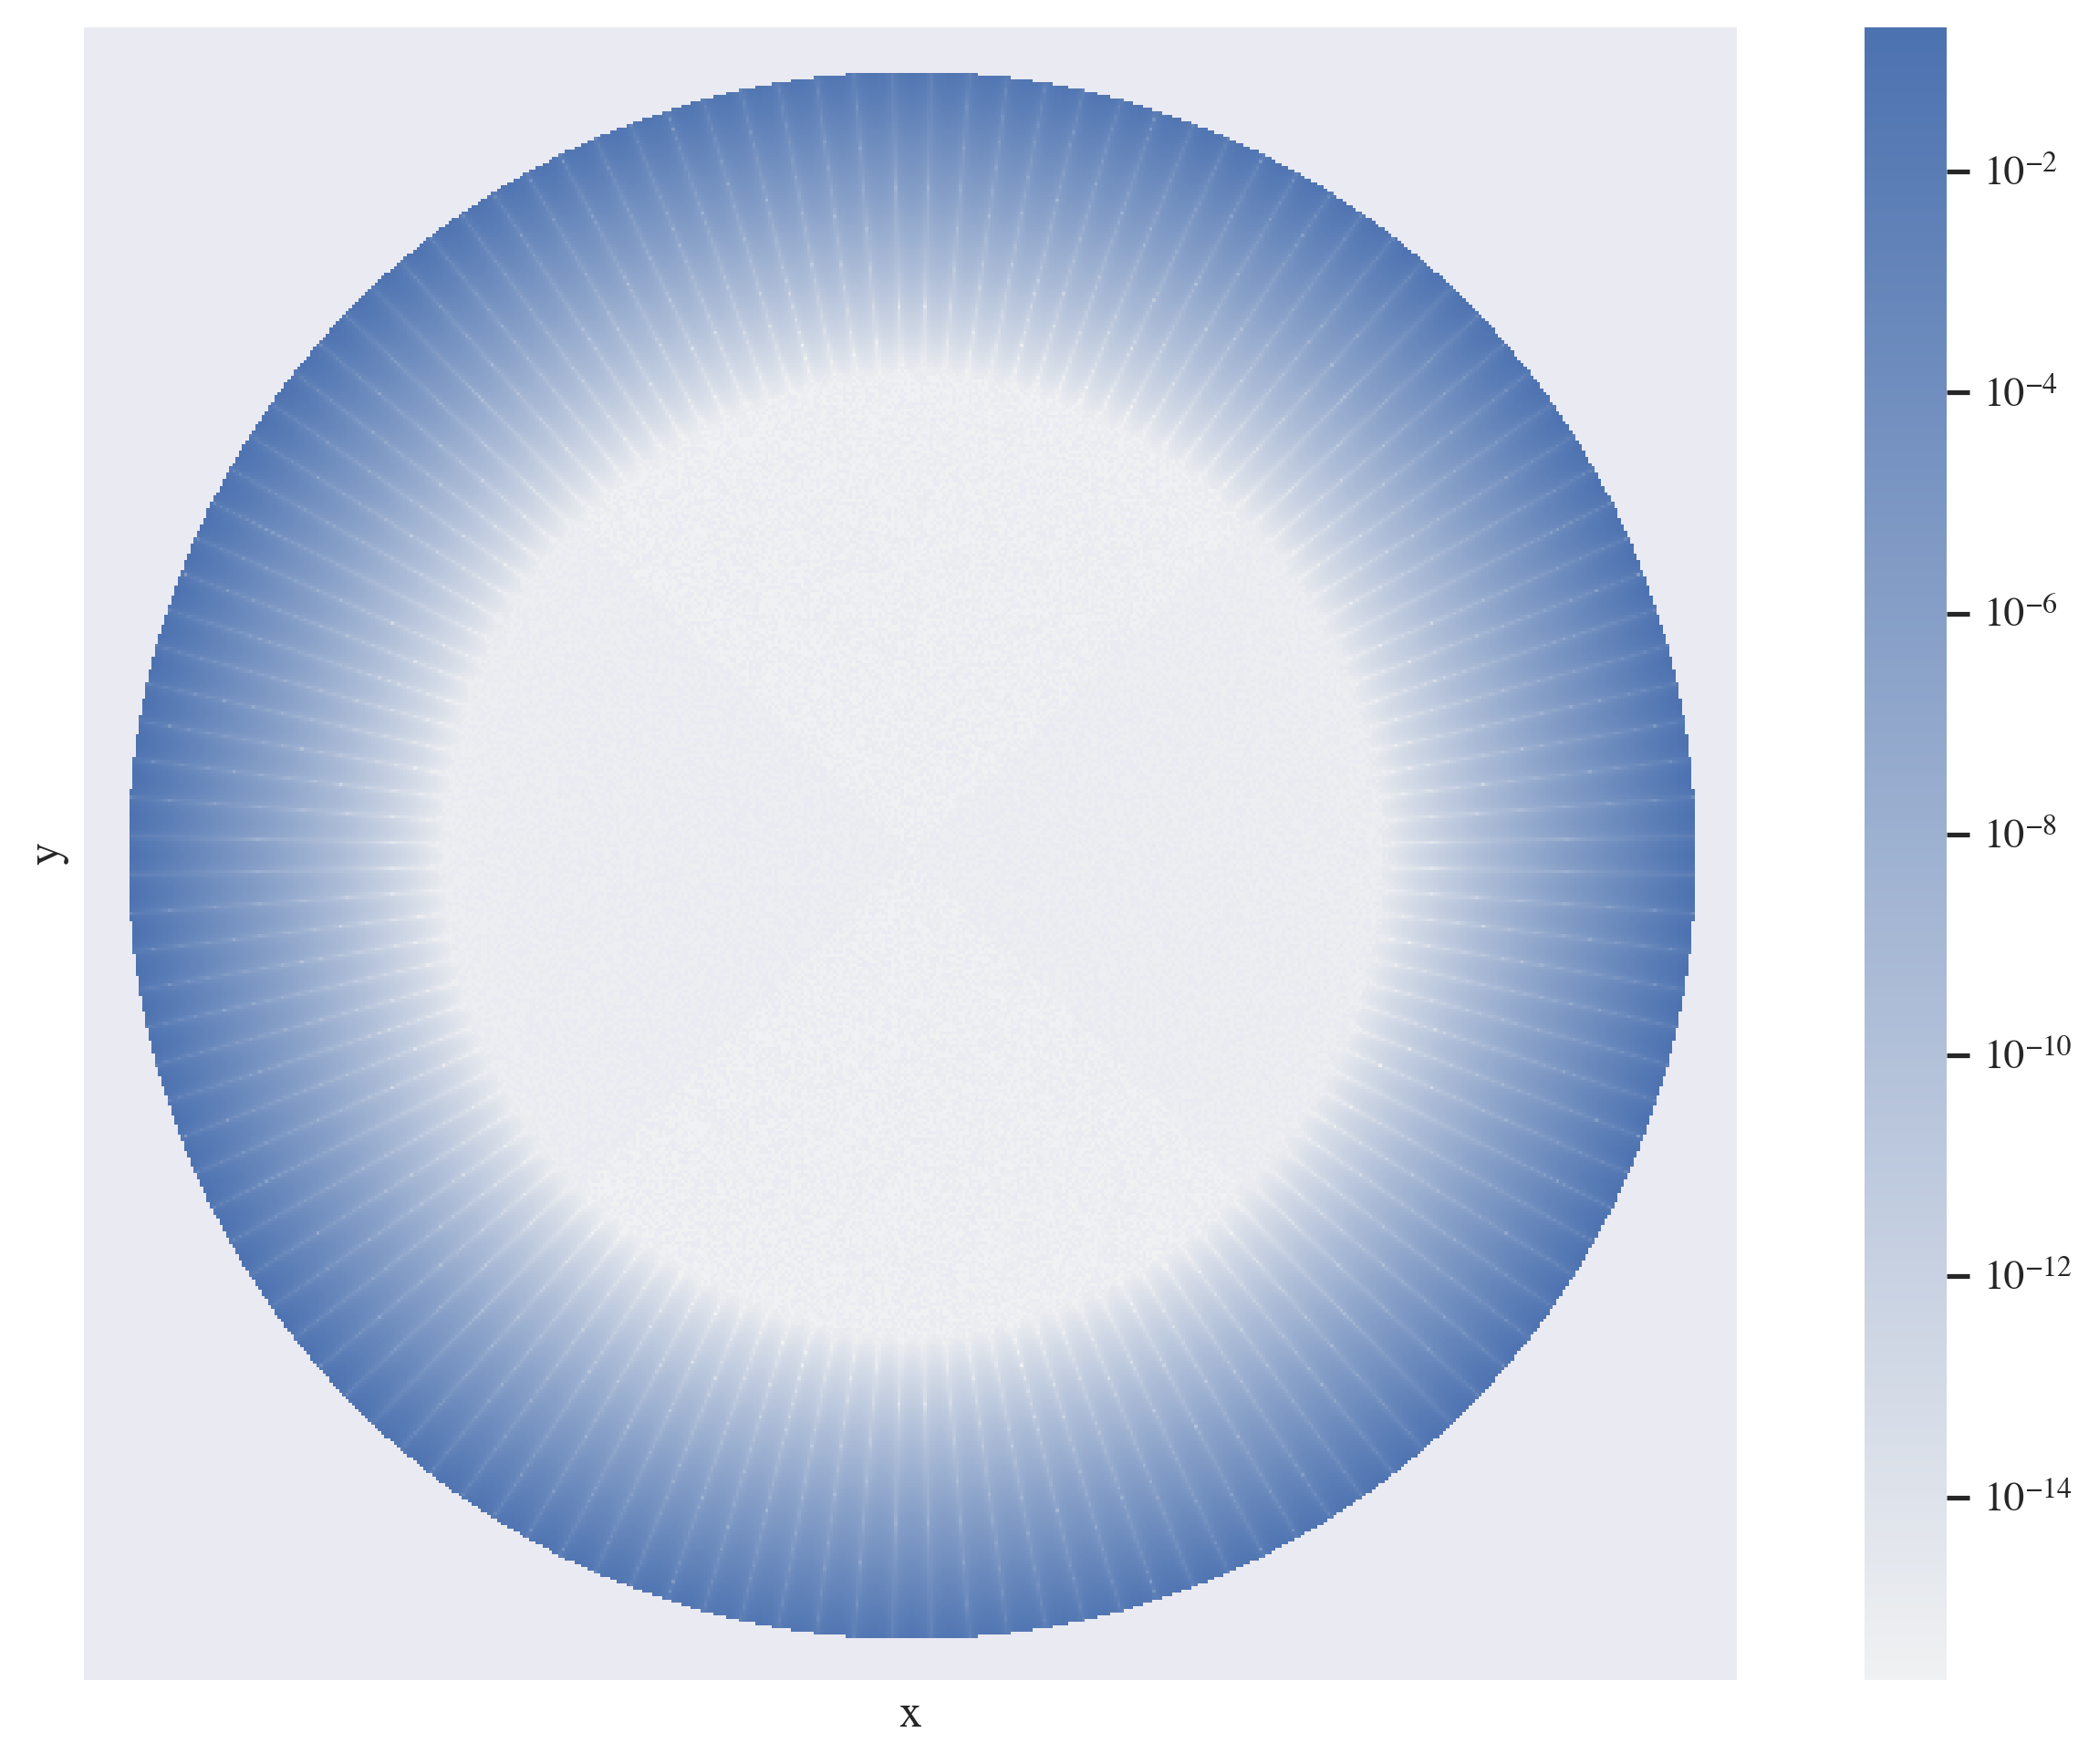

In [4]:
import seaborn as sns
sns.set()
def find_E(Xᵧ, BC, X, Δθ):
     UmX = np.array([Xᵧ[0,:]]).T - X[0,:]
     VmY = np.array([Xᵧ[1,:]]).T - X[1,:]
     # display(UmX.*(1.- (X[:, 1].^2 + X[:, 2].^2)))
     E_x = (Δθ / np.pi) * (X[0,:] * (UmX ** 2 + VmY ** 2) - UmX * (1 - (X[0,:] ** 2 + X[1,:] ** 2)))* np.array([BC]).T / (UmX ** 2 + VmY ** 2) ** 2
     E_y = (Δθ / np.pi) * (X[1,:] * (UmX ** 2 + VmY ** 2) - VmY *(1 - (X[0,:] ** 2 + X[1,:] ** 2))) * np.array([BC]).T / (UmX ** 2 + VmY ** 2) ** 2
     E_x = np.sum(E_x, axis=0)
     E_y = np.sum(E_y, axis=0)
     return np.array([E_x, E_y])

def find_φ(Xᵧ, BC, X, Δθ):
     UmX = np.array([Xᵧ[0,:]]).T - X[0,:]
     VmY = np.array([Xᵧ[1,:]]).T - X[1,:]
     φ = (Δθ / (2* np.pi)) * (1 - (X[0,:]**2 + X[1,:]**2))* np.array([BC]).T / (UmX**2 + VmY**2)
     φ = np.real(np.sum(φ, axis=0))
     return φ

cover = np.reshape(X[0,:] ** 2 + X[1,:] ** 2 <= 0.9, (NG, NG))

# Find the error in the φ
φ = find_φ(Xᵧ, φᵧ, X, Δθ)
from matplotlib.colors import LogNorm, Normalize
# Find the true φ
true_φ = np.reshape(X[0,:]**2 - X[1,:]** 2, (NG, NG))+ 2
φ = np.reshape(φ, (NG, NG))
# Find the error in the φ
Δφ = (true_φ - φ) * cover
# Find the maximum value of the error
max_val = np.max(np.abs(Δφ))
# Create a heatmap of the error
tick = np.linspace(-1,1,16, endpoint=False)

plt.rcParams["font.family"] = "Times"
fig, axes = plt.subplots(1,1, dpi=300, figsize=(12,8))
sns.heatmap(np.abs(Δφ), square=True, norm=LogNorm(), xticklabels=False, yticklabels=False, cmap=sns.color_palette("light:b", as_cmap=True))
plt.xlabel("x")
plt.ylabel("y")

In [15]:
import pretty_errors

/var/folders/lw/ksgpv9453l90fn4_q0bhpq_m0000gn/T/ipykernel_852/824184142.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  errors = errors.append({"NB": N, "Norm": r"||E-E_{num}||_1", "DE": np.sum(ΔE) / 512 ** 2}, ignore_index=True)
/var/folders/lw/ksgpv9453l90fn4_q0bhpq_m0000gn/T/ipykernel_852/824184142.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  errors = errors.append({"NB": N, "Norm": r"||E-E_{num}||_2", "DE": np.sqrt(np.sum(ΔE ** 2) / 512 ** 2)}, ignore_index=True)
/var/folders/lw/ksgpv9453l90fn4_q0bhpq_m0000gn/T/ipykernel_852/824184142.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  errors = errors.append({"NB": N, "Norm": r"||E-E_{num}||_\infty", "DE": np.max(ΔE)}, ignore_index=True)
/var/folders/lw/k

ValueError: If using all scalar values, you must pass an index

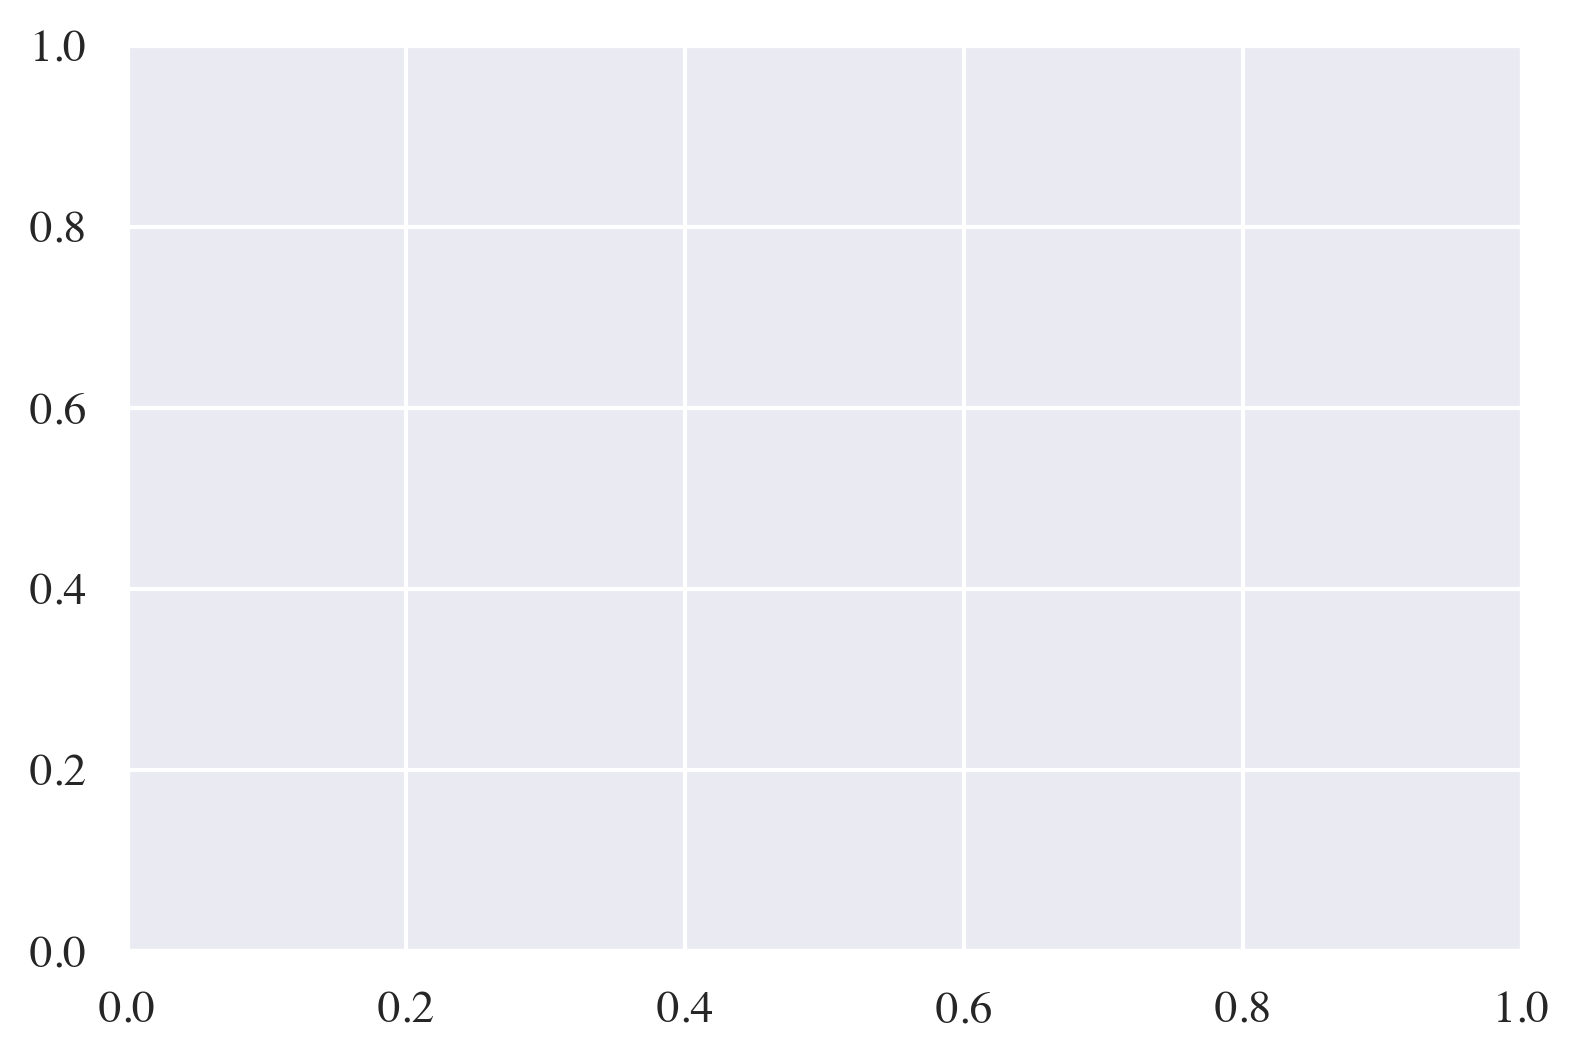

In [6]:
from matplotlib.colors import LogNorm, Normalize
import pandas as pd
plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rcParams['mathtext.bf'] = 'Times:bold'
fig, axes = plt.subplots(1, 1, dpi=300)
errors = pd.DataFrame(columns=["NB", "Norm", "DE"])
for i in range(32):
    N = 32 + i * 4
    NG = 512
    θ = np.linspace(0, 2 * np.pi, N, endpoint=False)
    Δθ = 2 * np.pi / N
    Xᵧ = np.array([np.sin(θ), np.cos(θ)])
    φᵧ = Xᵧ[0,:]**2 - Xᵧ[1,:]**2 + 2

    # Define the ranges for each dimension
    x_range = np.linspace(-1, 1, NG, endpoint=False)

    # Generate the grid points
    X,Y = np.meshgrid(x_range, x_range)
    X = X.flatten()
    Y = Y.flatten()
    X = np.array([X, Y])

    
    # φ = find_φ(Xᵧ, φᵧ, X, Δθ)
    E = find_E(Xᵧ, φᵧ, X, Δθ)
    E_x = np.reshape(E[0,:], (NG, NG))
    E_y = np.reshape(E[0,:], (NG, NG))
    # Find the true φ
    # true_φ = np.reshape(X[0,:]**2 - X[1,:]** 2, (NG, NG))+ 2
    true_Ex = np.reshape(- 2 * X[0,:], (NG, NG))
    true_Ey = np.reshape(2 * X[1,:], (NG, NG))
    φ = np.reshape(φ, (NG, NG))
    # Find the error in the φ
    ΔE = (np.sqrt((true_Ex - E_x) ** 2 + (true_Ex - E_x) ** 2) + 1e-17) * cover 
    # Find the maximum value of the error
    max_val = np.max(np.abs(ΔE))
    # Create a heatmap of the error
    tick = np.linspace(-1,1,16, endpoint=False)
    errors = errors.append({"NB": N, "Norm": r"||E-E_{num}||_1", "DE": np.sum(ΔE) / 512 ** 2}, ignore_index=True)
    errors = errors.append({"NB": N, "Norm": r"||E-E_{num}||_2", "DE": np.sqrt(np.sum(ΔE ** 2) / 512 ** 2)}, ignore_index=True)
    errors = errors.append({"NB": N, "Norm": r"||E-E_{num}||_\infty", "DE": np.max(ΔE)}, ignore_index=True)

    # sns.heatmap(ΔE, square=True, ax=axes.flat[i], norm=LogNorm(), xticklabels=False, yticklabels=False, cmap=sns.color_palette("Spectral", as_cmap=True), vmax=1)
    # sns.scatterplot(Xᵧ[0,:] * NG//2 + NG // 2, Xᵧ[1,:] * NG//2 + NG // 2, ax=axes.flat[i])
    # axes.flat[i].set_xlabel("x")
    # axes.flat[i].set_ylabel("y")
    # axes.flat[i].axis('equal')
    # axes.flat[i].set_title(r'$N_B$ = '+str(N))

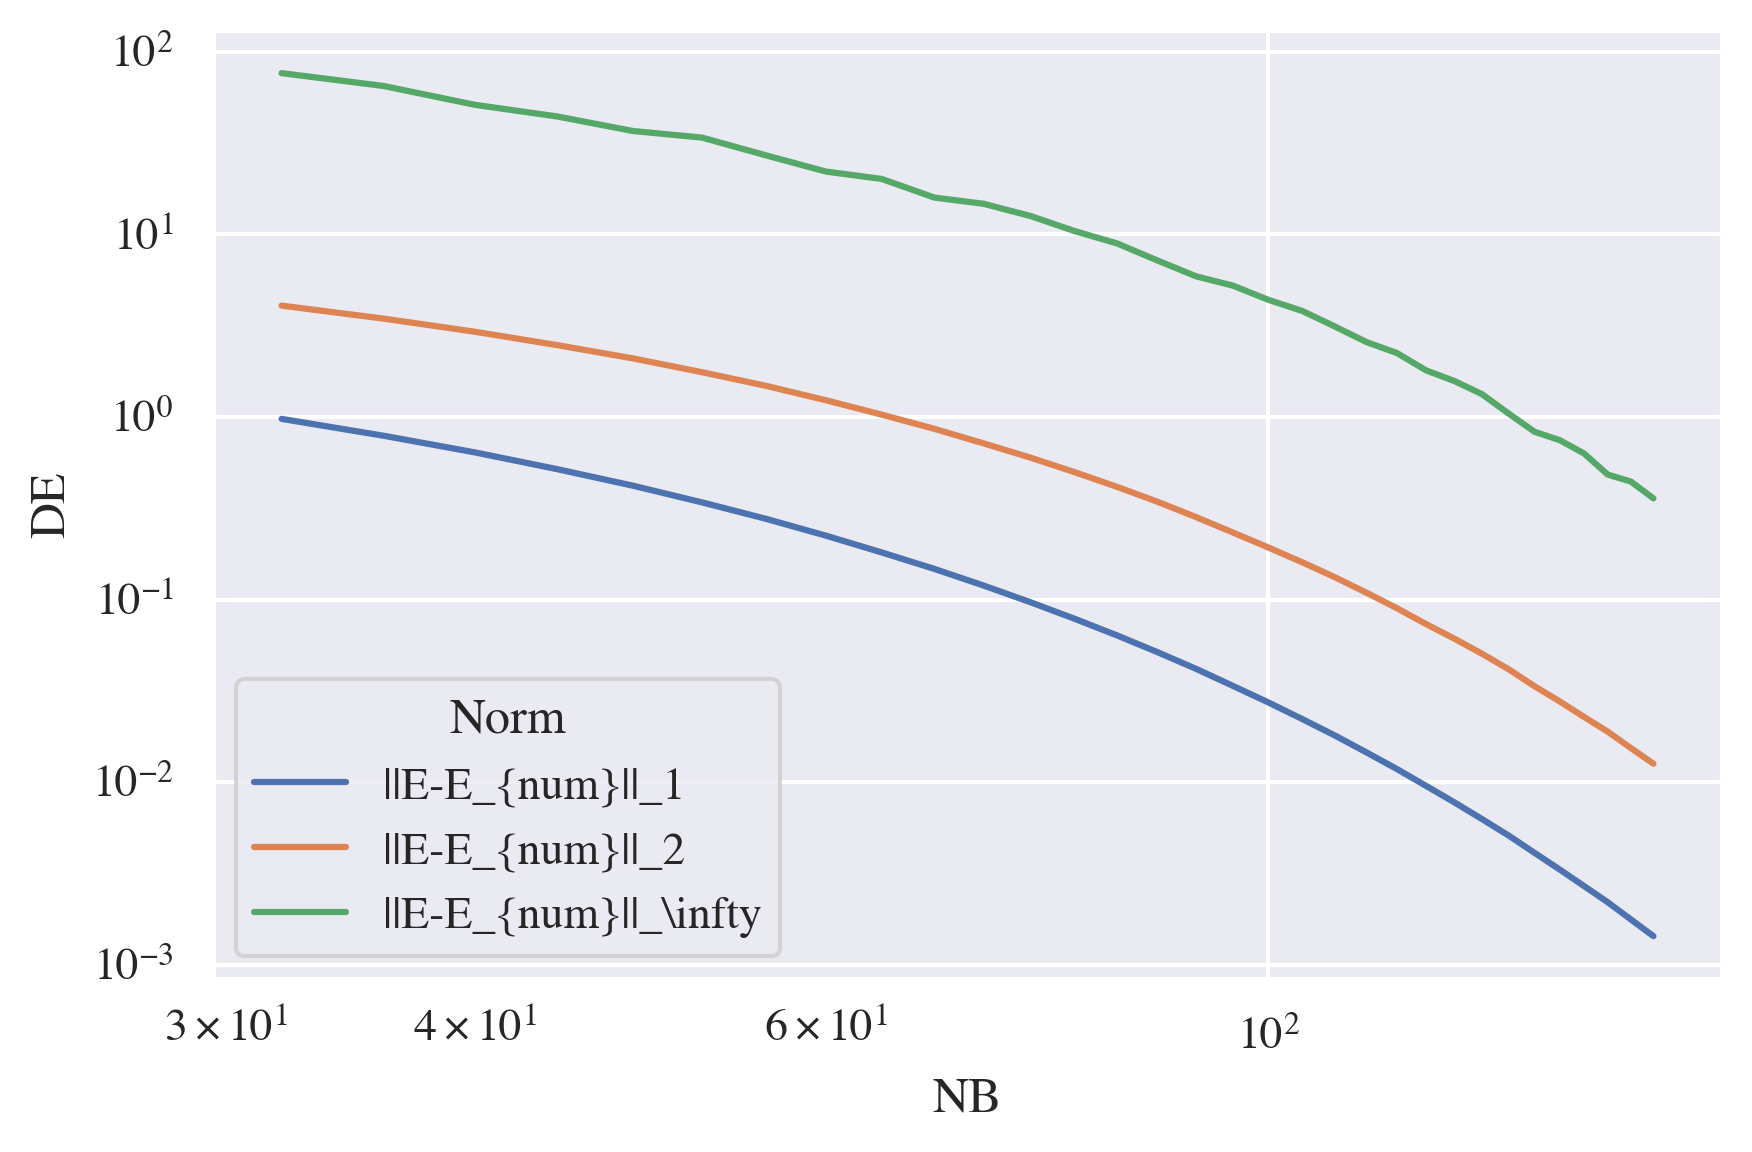

In [12]:
fig, axes = plt.subplots(1, 1, dpi=300)
sns.lineplot(data=errors, x="NB", y="DE", hue="Norm", )
plt.grid(which='both', axis='both', linestyle='-', linewidth=1, color='white')
plt.minorticks_on()
plt.grid(which='minor', axis='both', linestyle=':', linewidth=1, color='white')
plt.xlabel(r"$\Delta t$")
plt.title("Global energy error convergence with respect to " + r"$\Delta t$")
# plt.suptitle(r"$||\bf{E}^H-\bf{E}^H_{num}||_2$" + " for different " + r"$N_B$'s")
plt.show()

In [5]:
import sympy as sy
import numpy as np
x, y, theta, omega = sy.symbols('x y theta omega')
f = (1-x**2-y**2) * sy.exp(1j * theta * omega)/ ((sy.cos(theta)-x)**2 + (sy.sin(theta)-y)**2)
sy.init_printing(use_unicode=True)
F = sy.integrate(f, (theta, 0, 2*np.pi))

-(x**2 + y**2 - 1)*Integral(exp(1.0*I*omega*theta)/(x**2 - 2*x*cos(theta) + y**2 - 2*y*sin(theta) + sin(theta)**2 + cos(theta)**2), (theta, 0, 6.28318530717959))
